# Linear Regression, SGD, Decision Tree and ROC Curve

# Question 1: Linear Regression

Suppose we are given the following model 
$$
y_i \approx m x_i + \sum_{k=1}^K a_k \sin(\omega_k x_i) + \sum_{k=1}^K b_k \cos(\omega_k x_i)
$$

Show that this problem can be reduced to a least squares problem of form
$$
y \approx A(\omega, K) \theta
$$
where the design matrix $A(\omega, K)$ is determined solely by the frequency parameters $\omega$ and the remaining parameters can be organized as a vector $\theta = (m, a_{1:K}, b_{1:K})$. 


# Answer

The above formula can be shown like this:

\begin{eqnarray}
\left(
\begin{array}{c}
y_0 \\ y_1 \\ \vdots \\ y_{N-1} 
\end{array}
\right)
\approx
\left(
\begin{array}{ccc}
x_0 & \sin(\omega_1 x_0) & \cdots & \sin(\omega_K x_0) & \cos(\omega_1 x_0) & \cdots & \cos(\omega_K x_0) \\ 
x_1 & \sin(\omega_1 x_1) & \cdots & \sin(\omega_K x_1) & \cos(\omega_1 x_1) & \cdots & \cos(\omega_K x_1) \\
\vdots & \vdots &  & \vdots & \vdots &  & \vdots \\ 
x_{N-1} & \sin(\omega_1 x_{N-1}) & \cdots & \sin(\omega_K x_{N-1}) & \cos(\omega_1 x_{N-1}) & \cdots & \cos(\omega_K x_{N-1})
\end{array}
\right) 
\left(
\begin{array}{c}
 m \\ a_1 \\ \vdots \\ a_K \\ b_1 \\ \vdots \\ b_K
\end{array}
\right)
\end{eqnarray}

The above formulation is the one used in least squares and we define this problem like least squares.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd

## The Program That Generate Data from Above Model

The parameters and other specification is given in code and the explanations are given near the parameters.

In [2]:
def generate_y(N, m, K, noise, frequency):
    x = np.random.rand(N) * 2 - 1
    y = m * x + noise * np.random.randn(N)
    
    omega = np.zeros(K)
    for k in range(1, K + 1):
        omega[k - 1] = (2 * np.pi / K) * frequency * k
        
    theta = np.array([m])
    for k in range(1, K + 1):
        y += a * np.sin(omega[k - 1] * x)
        theta = np.concatenate((theta, np.array([a])), axis = 0)
    for k in range(1, K + 1):
        y += b * np.cos(omega[k - 1] * x)
        theta = np.concatenate((theta, np.array([b])), axis = 0)
    
    x = x.reshape(len(x), 1)
    y = y.reshape(len(y), 1)
    theta = theta.reshape(len(theta),1)
    omega = omega.reshape(len(omega),1)
    return x, y, theta, omega

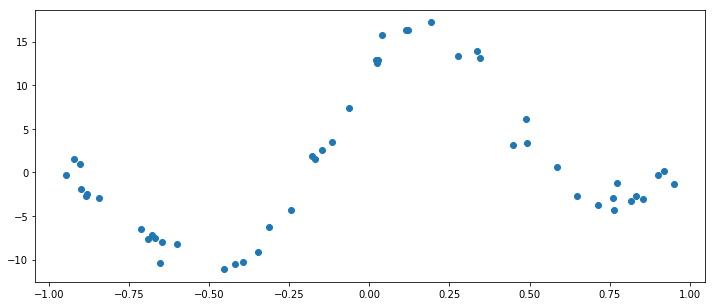

In [3]:
noise = 1 # Rate of the noise
frequency = 1 # Frequency
a = 3 #sine amplitude parameter
b = 3 #cosine amplitude parameter
K = 4 
N = 50 #Number of Samples
m = 0.2 #number of coefficient

x, y, theta, omega = generate_y(N, m, K, noise, frequency)

plt.figure(figsize = (12,5))
plt.plot(x, y, 'o')
plt.show()

## For a given set of frequency parameters $\omega$ solve the problem using least squares

In this experiment, we will assume that we know the frequency parameters $\omega$ (hence also the dimension $K$). Write a program to find the least squares solution of $\theta$.

In [4]:
# Setup the vandermonde matrix
def make_design_matrix(x, K, omega):
    # Setup the Design matrix
    A = x
    for k in range(1, K + 1):
        A = np.hstack((A, np.sin(omega[k - 1] * x)))
    for k in range(1, K + 1):
        A = np.hstack((A, np.cos(omega[k - 1] * x)))
    return A

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


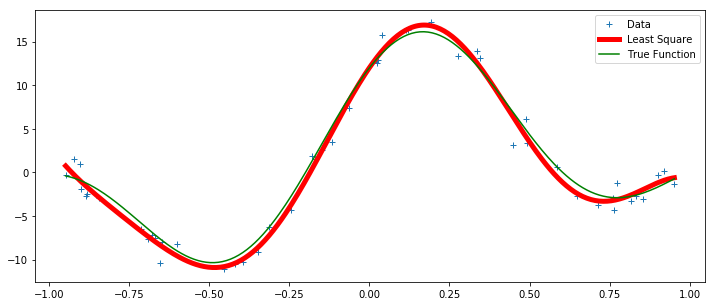

Error
[0.58845772]
True Theta vs. Theta_Calculated
[0.2] [-229.32706183]
[3.] [237.6931677]
[3.] [-53.50868645]
[3.] [10.30801465]
[3.] [4.63198095]
[3.] [3.36096311]
[3.] [0.97606592]
[3.] [5.48007193]
[3.] [2.19341746]


In [5]:
omega_true = np.zeros(K)
for k in range(1, K + 1):
    omega_true[k - 1] = (2*np.pi/K)*frequency * k

A = make_design_matrix(x, K, omega_true)
xx = np.matrix(np.linspace(np.asscalar(min(x)),np.asscalar(max(x)),300)).T.reshape(300,1)
A2 = make_design_matrix(xx, K, omega_true)

theta_calculated, _, _, _ = np.linalg.lstsq(A, y)
f = A2.dot(theta_calculated)
true_f = A2.dot(theta)

e = y - A.dot(theta_calculated)
E = (1 / 2) * e.T.dot(e) /len(e)

plt.figure(figsize = (12,5))
plt.plot(x, y, '+', label = "Data")
plt.plot(xx, f, 'r', label = "Least Square", linewidth=5)
plt.plot(xx, true_f, 'g', label = "True Function")
plt.legend()
plt.show()
print ("Error")
print (E[0])
print ("True Theta vs. Theta_Calculated")
for i in range(len(theta)):
    print (theta[i], theta_calculated[i])

## Evaluate and visualize the error as a function of $\omega$ only

This error can be fully visualized for $K=1$ and $K=2$.

Note that for any given $\omega$ we could run the least squares algorithm to find the best $m, \alpha, \beta$ parameters. We will denote the optimal parameters as $\theta^*(\omega) = (m, a, b)^*$. We will exhaustively evaluate the error for all $\omega$ by computing $E(\omega, \theta^*(\omega))$.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


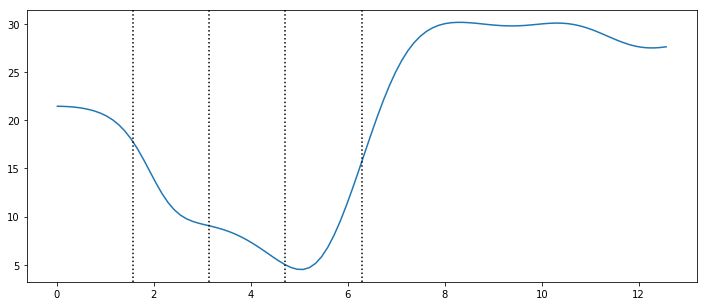

In [6]:
# Generate different omegas and compute error for each of them.
K = 1
MAX_OM = 4*np.pi
OM = np.linspace(0.01,MAX_OM,100)
EE = np.zeros(len(OM))
for i in range(len(OM)):
    A = make_design_matrix(x, K, [OM[i]])
    theta_calculated,_,_,_  = np.linalg.lstsq(A, y)
    e = y - A.dot(theta_calculated)
    E = (1 / 2) * e.T.dot(e) / len(e)
    EE[i] = E[0]

plt.figure(figsize = (12,5))
plt.plot(OM,EE)
for o in omega:
    plt.axvline(o, color='k',ls=':')
    #plt.axhline(o, color='w',ls=':')
plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


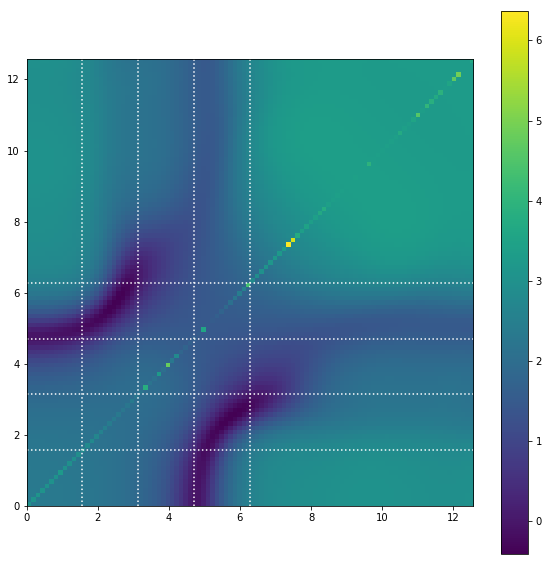

In [7]:
MAX_OM = 4*np.pi
K = 2
OM = np.linspace(0.01,MAX_OM,100)
EE = np.zeros((len(OM),len(OM)))
for i in range(len(OM)):
    for j in range(len(OM)):
        A = make_design_matrix(x, K, [OM[i], OM[j]])
        theta_calculated, E, rank, sigma = np.linalg.lstsq(A, y)
        e = y - A.dot(theta_calculated)
        E = (1 / 2) * e.T.dot(e) / len(e)
        EE[i][j] = E[0]

# These lines are for plotting purposes
l = min(OM)
r = max(OM)
plt.figure(figsize=(10,10))
plt.imshow(np.log(EE), extent=(l,r,l,r), interpolation='nearest', origin='lower')
for o in omega:
    plt.axvline(o, color='w',ls=':')
    plt.axhline(o, color='w',ls=':')

plt.colorbar()
plt.show()

# Question 2: Stochastic Gradient Descent

For the sinusoidal model, develop a SGD method for estimating $\omega$ as well as the other parameters.

## Derive and implement the expression of the gradient

$$
E_i(m,a,b,\omega) = \frac{1}{2}\left(\left(m x_i + \sum_{k=1}^K a_k \sin(\omega_k x_i) + \sum_{k=1}^K b_k \cos(\omega_k x_i)\right) - y_i\right)^2
$$

$$
e_i = \left(m x_i + \sum_{k=1}^K a_k \sin(\omega_k x_i) + \sum_{k=1}^K b_k \cos(\omega_k x_i)\right) - y_i
$$

\begin{eqnarray}
\nabla E_i = \left(\begin{array}{c} \frac{\partial E_i}{\partial m} \\ \frac{\partial E_i}{\partial a_1} \\
\vdots \\ \frac{\partial E_i}{\partial a_K} \\  \frac{\partial E_i}{\partial b_1} \\
\vdots \\ \frac{\partial E_i}{\partial b_K} \\  \frac{\partial E_i}{\partial \omega_1} \\
\vdots \\ \frac{\partial E_i}{\partial \omega_K} 
\end{array}
\right) = 
e_i \left(\begin{array}{c} x_i \\ \sin(\omega_1 x_i) \\ \vdots \\ \sin(\omega_K x_i) \\ 
\cos(\omega_1 x_i) \\ \vdots \\ \cos(\omega_K x_i) \\ a_1 \cos(\omega_k x_i) x_i - b_1 \sin(\omega_1 x_i) x_i \\
\vdots \\ a_K \cos(\omega_K x_i) x_i - b_K \sin(\omega_K x_i) x_i\end{array}
\right)
\end{eqnarray}

In [8]:
def model_fun(x, K, theta, omega):
    A = x
    for k in range(1, K + 1):
        A = np.hstack((A, np.sin(x * omega[k - 1])))
    for k in range(1, K + 1):
        A = np.hstack((A, np.cos(x * omega[k - 1])))
        
    result = A.dot(theta)
    result = result.reshape(len(result),1)
    return A, result

def grad_fun(y, x, K, theta, omega):
    A, result = model_fun(x, K, theta, omega)
    partial_derivative = []
    err = result - y
    E = np.sum(err**2)/(2*len(x))
    d_theta = A.T.dot(err)/len(x)
    d_A = np.zeros_like(x)
    for k in range(1, K + 1):
        d_A = np.hstack((d_A, x * np.cos(omega[k - 1] * x)))
        derivative = np.zeros_like(A)
        derivative[:,k:2*K+1:K] = 1
        partial_derivative.append(derivative)
    for k in range(1, K + 1):
        d_A = np.hstack((d_A, -x * np.sin(omega[k - 1] * x)))
    
    
    d_omega = np.zeros((K,1))
    for i in range(K):
        d_omega[i] = ((d_A*partial_derivative[i]).dot(theta)).T.dot(err)/len(x)
    
    return E, d_theta, d_omega

## Implement SGD

Implement SGD and test it on synthetic data generated in Question 1. 
Show the evolution of the error as a function of iterations.


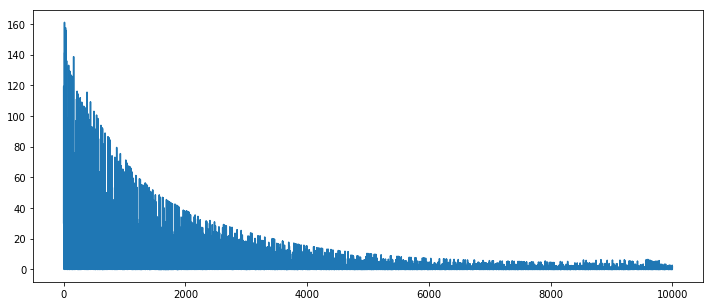

In [10]:
np.random.seed(1)
K_try = 2
# Initialize
ep = 0.001
om = (np.random.rand(K_try) * 2 * np.pi).reshape(K_try, 1)
th = (np.random.randn(len(om)*2 + 1)).reshape(len(om)*2 + 1, 1)

ERR = []
OM_PATH = []

MAX_EPOCH = 10000
BATCH_SIZE = 1
if BATCH_SIZE >= len(x):
    BATCH_SIZE = len(x)
for epoch in range(MAX_EPOCH):
    #idx = np.random.choice(len(x), 1)
    index = np.random.choice(len(x), BATCH_SIZE, replace=False)
    
    # Implement SGD here
    E, d_th, d_om = grad_fun(y[index], x[index], K_try, th, om)
    th = th - ep * d_th
    om = om - ep * d_om
    
    if epoch%1 == 0: 
        #print(epoch,':',E)
        # print(w)    
        OM_PATH.append(om)
        ERR.append(E)
    
# PLot the error as a function of iteratation
plt.figure(figsize=(12,5))
plt.plot(ERR)
plt.show()

## Plot the true function and the fit

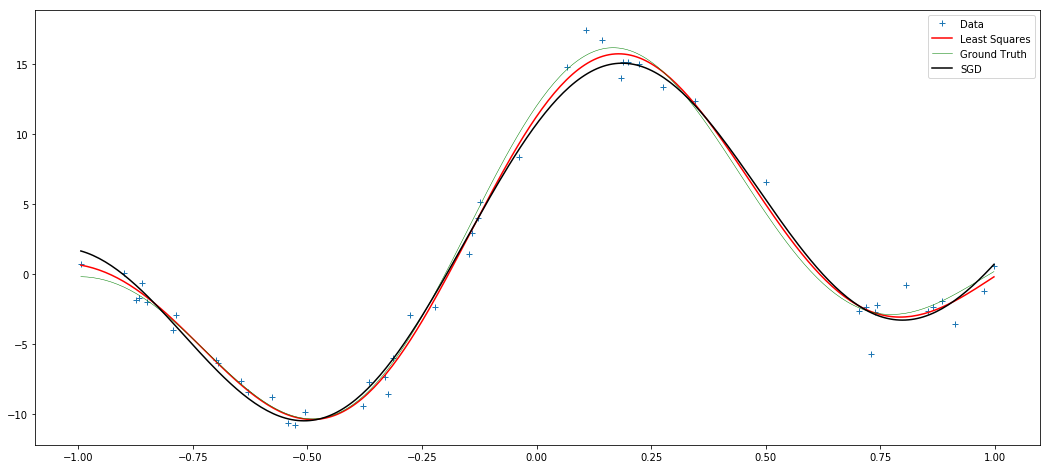

In [10]:
# Plot data, LS and SGD at once 
plt.figure(figsize = (18,8))
plt.plot(x, y, '+', label = "Data")
plt.plot(xx, f, 'r', label = "Least Squares")
plt.plot(xx, true_f, 'g',linewidth = 0.5, label = "Ground Truth")
plt.plot(xx, model_fun(xx, K_try, th, om)[1], 'k', label = "SGD")
plt.legend()
plt.show()

## Plot the error surface and plot the path taken by SGD

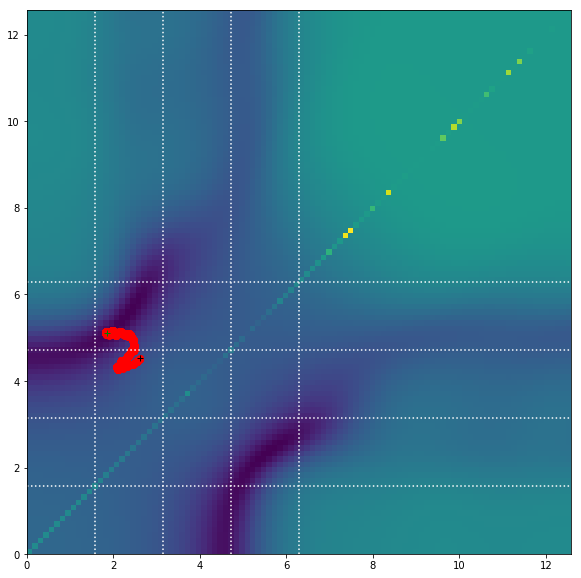

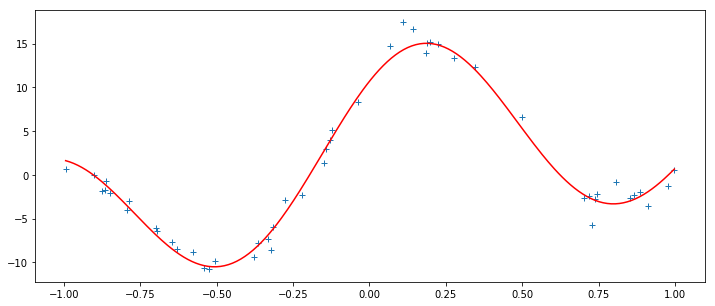

In [11]:
l = min(OM)
r = max(OM)
plt.figure(figsize=(10,10))
plt.imshow(np.log(EE), extent=(l,r,l,r), interpolation='nearest', origin='lower')
for o in omega:
    plt.axvline(o, color='w',ls=':')
    plt.axhline(o, color='w',ls=':')

plt.plot(np.asarray(OM_PATH)[0,0], np.asarray(OM_PATH)[0,1], 'k+')
plt.scatter(np.asarray(OM_PATH)[:,0].flatten(), np.asarray(OM_PATH)[:,1].flatten(), color = "r")
plt.plot(np.asarray(OM_PATH)[-1,0], np.asarray(OM_PATH)[-1,1], 'g+')
plt.show()

plt.figure(figsize = (12,5))
plt.plot(x, y, '+')
plt.plot(xx, model_fun(xx, K_try, th, om)[1], 'r')
plt.show()

# Question 3: Decision Trees

In this exercise we will investigate and compare two alternative measures for choosing a 
decision boundary and a feature in decision trees: (a) Gini impurity and (b) Information Gain. 

Suppose there are $C$ classes in a dataset with $N$ samples. The number of examples having class $c$ is
$N_c$ where $\sum_c N_c = N$. 

At each step, a decision tree algorithm tries multiple potential thresholds (remember that as the basic decision tree algorithm looks at a single feature at a time
we only need to consider midpoints) and selects the one that would lead to the "purest" partitions. We will measure 
the impurity by Entropy or the Gini impurity.


A given threshold $\tau$ subdivides the dataset into two partitions of sizes $L$ and $R$
according to a single feature $x$: $L$ data points with $x< \tau$ and $R$ data points with $x \geq \tau$ where $L + R = N$. The number of data points of class $c$ in each partition is $L_c$ and $R_c$. We have $L_1 + L_2 + \dots + L_C = L$ and $R_1 + R_2 + \dots + R_C = R$.

The Gini impurity is defined as:
$$G(p_{1:C}) = 1 - \Sigma_c p_c^2$$
where $p_i$ is the frequency of each class

The entropy, on the other hand is defined as 
$$H(p_{1:C}) =  - \Sigma_c p_c \log{p_c}$$
Note that $\log$ stands for the natural logarithm.

Compute the following indices

### Gini:
$$
U_G(\tau) = \frac{L}{N} G(L_{1:C}/L) + \frac{R}{N} G(R_{1:C}/R)
$$
### Entropy:
$$
U_H(\tau) = \frac{L}{N} H(L_{1:C}/L) + \frac{R}{N} H(R_{1:C}/R)
$$

### Information gain:
$$
I(\tau) = H(N_{1:C}/N) - U_H(\tau)
$$


Given a dataset write a program that plots the scatterplot any two features and computes each index.


In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd
from sklearn.datasets import load_iris

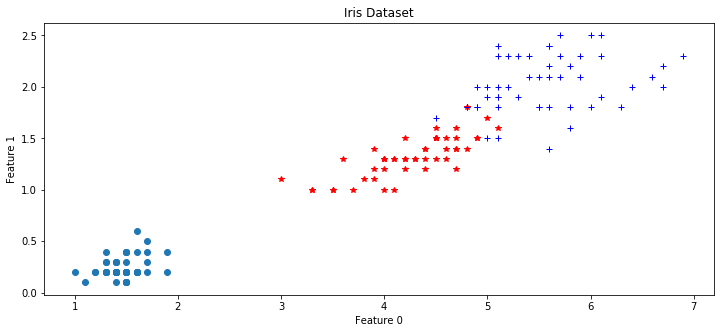

In [13]:
dataset = load_iris()
X, c = dataset['data'][:,2:], dataset['target']
M, N = X.shape
plt.figure(figsize = (12,5))
plt.plot(X[0:50,0], X[0:50,1], 'o')
plt.plot(X[50:100,0], X[50:100,1], 'r*')
plt.plot(X[100:150,0], X[100:150,1], 'b+')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Iris Dataset")
plt.show()

In [14]:
# Calculate counts of each class for probability calculation 
def calculate_counts(data):
    label = data
    unique, counts = np.unique(label, return_counts=True)
    prob_c = dict(zip(unique, counts))
    return prob_c

In [15]:
# Calcluates gini impurity for given data set
def gini(data):
    
    pc_count = calculate_counts(data)
    N = sum(pc_count.values())
    total_pc = 0
    for key, value in pc_count.items():
        total_pc += (value/N)**2
    impurity = 1 - total_pc
    return impurity

# Gini Impurity changes between 0 and 1. 
# For purest dataset (only one class label), we expect 0 impurity. 
print("For all dataset, there is "+ str(gini(dataset['target'])) + " misclassifying chance. ")

For all dataset, there is 0.6666666666666667 misclassifying chance. 


In [16]:
# Calcluates entropy for given data set
def entropy(data):
    pc_count = calculate_counts(data)
    N = sum(pc_count.values())
    total_pc = 0
    for key, value in pc_count.items():
        total_pc += ( np.log((value/N)) * (value/N) )
    entropy = -1 * total_pc
    return entropy

entropy(dataset['target'])

1.0986122886681096

In [17]:
# Splits tree branches for given threshold
def split_data(data,threshold,labels):
    left = list()
    right = list()
    for i in range(len(data)):
        if data[i] < threshold: 
            left.append(labels[i])
        else:
            right.append(labels[i])
    return np.array(left), np.array(right)

In [18]:
# Calculate UG(τ)=LNG(L1:C/L)+RNG(R1:C/R)
def gini_all(data, threshold, labels):
    L, R = split_data(data,threshold,labels)
    N = np.sum(len(L)+len(R))
    gini_sum = (len(L)/N) * gini(L) + (len(R)/N) * gini(R) 
    return gini_sum

gini_all(X[:,0],2,c)
# 0.91

0.3333333333333333

In [19]:
# Calculate UH(τ)=LNH(L1:C/L)+RNH(R1:C/R)
def entropy_all(data, threshold,labels):
    L, R = split_data(data,threshold,labels)
    N = np.sum(len(L)+len(R))
    entropy_sum = (len(L)/N) * entropy(L) + (len(R)/N) * entropy(R) 
    return entropy_sum

entropy_all(X[:,0],2,c)

0.46209812037329684

In [20]:
# Caclculate I(τ)=H(N1:C/N)−UH(τ)
def information_gain(data, threshold,labels):
    H_N = entropy(labels)
    U_H = entropy_all(data, threshold,labels)
    inf_gain =  H_N - U_H
    return inf_gain

information_gain(dataset['target'],3,c)

0.0

In [21]:
def analyze_features(full_data, labels, feature_number):
    data = full_data[:, feature_number]
    entropy_ = list()
    gini_ = list()
    information_gain_ = list()
    for threshold in data:
        entropy_.append(entropy_all(data, threshold, labels))
        gini_.append(gini_all(data, threshold, labels))
        information_gain_.append(information_gain(data, threshold, labels))
        
    plt.figure(figsize = (12,5))
    plt.scatter(data[np.where(c == 0)], len(c[np.where(c == 0)])*[0],  marker='o', color='blue')
    plt.scatter(data[np.where(c == 1)], len(c[np.where(c == 1)])*[0],  marker='^', color='yellow')
    plt.scatter(data[np.where(c == 2)], len(c[np.where(c == 2)])*[0],  marker='*', color='green')
    plt.scatter(data, entropy_, marker='.',color='red', label='Entropy')
    plt.scatter(data, gini_, marker='.',color='blue',label='Gini')
    plt.scatter(data, information_gain_, marker='o',label='Information Gain')
    plt.legend(loc='upper right')
    plt.xlabel('Feature ' + str(feature_number) + ' - Petal Length(cm)')
    plt.ylabel('Impurity/Information Gain')
    plt.show()

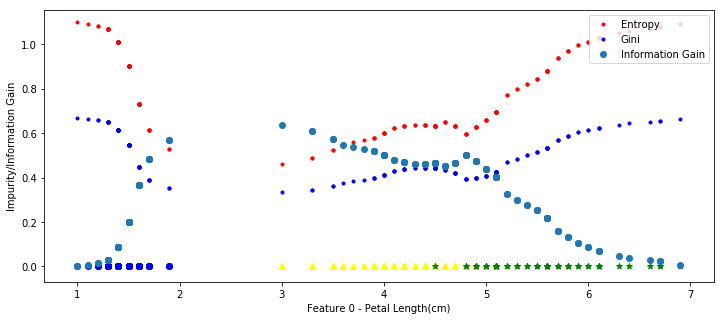

In [22]:
analyze_features(X, c, 0)

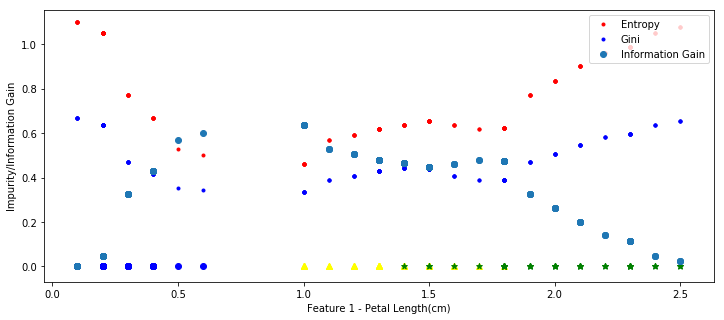

In [23]:
analyze_features(X, c, 1)

# Question 4: ROC curve and the AUC score

Suppose you are given two probability distributions, each denoting a class conditional density of a feature.

Sample from the distributions and estimate the ROC curve and the AUC (area under the curve) score.

The densities should be 

1. Gaussians with mean $\mu_0$ and variance $V_0$ $\mathcal{N}(\mu_0, V_0)$ and $\mu_1$ and variance $V_1$
1. Symmetric triangular distribution on the inteval $(a_0, b_0)$ and $(a_1, b_1)$

Note that your code should work for any variance and mean value. 
Here are example plots for $\mathcal{N}(0,0.1)$ and $\mathcal{N}(1,0.5)$

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [25]:
mu1, sigma1 = 0, 0.5# mean and standard deviation
mu2, sigma2 = 1, 0.5 # mean and standard deviation
N = 1000
s1 = np.random.normal(mu1, sigma1, N)
s2 = np.random.normal(mu2, sigma2, N)

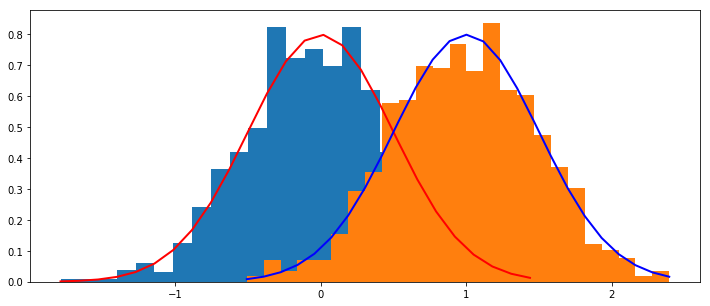

In [26]:
plt.figure(figsize = (12,5))
count1, bins1, ignored1 = plt.hist(s1, 25, density = True)
count2, bins2, ignored2 = plt.hist(s2, 25, density = True)
plt.plot(bins1, 1/(sigma1 * np.sqrt(2 * np.pi)) *np.exp( - (bins1 - mu1)**2 / (2 * sigma1**2) ),linewidth=2, color='r')
plt.plot(bins2, 1/(sigma2 * np.sqrt(2 * np.pi)) *np.exp( - (bins2 - mu2)**2 / (2 * sigma2**2) ),linewidth=2, color='b')
plt.show()

In [27]:
s1_matrix = np.stack((s1,np.zeros(N)), axis=1)
s2_matrix = np.stack((s2,np.ones(N)), axis=1)
final_matrix = np.concatenate((s1_matrix, s2_matrix), axis=0)
threshold = 0.5 

y = final_matrix[:,1]
scores = final_matrix[:,0]

In [28]:
scores_binary = (scores > threshold).astype(int)

# Confusion Matrix
conf = metrics.confusion_matrix(y, scores_binary)

# Precision Score
precision = metrics.precision_score(y, scores_binary)

# Recall Score
recall = metrics.recall_score(y, scores_binary)

# F1 Score 
f1 = metrics.f1_score(y, scores_binary)

print("Precision Score:\n", precision)
print("Recall Score:\n", recall)
print("F1 Score:\n", f1)
print("Confusion Matrix:\n", conf)

Precision Score:
 0.8467005076142132
Recall Score:
 0.834
F1 Score:
 0.840302267002519
Confusion Matrix:
 [[849 151]
 [166 834]]


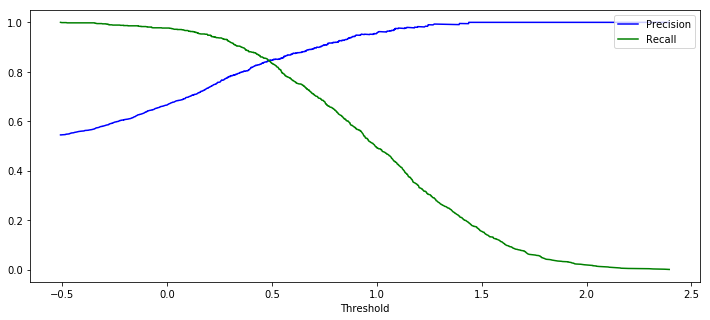

In [29]:
def plot_roc(precisions, recalls, thresholds):
    plt.figure(figsize = (12,5))
    plt.plot(thresholds, precisions[:-1], "b", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.show()
    
precisions, recalls ,thresholds = metrics.precision_recall_curve(y, scores)
plot_roc(precisions, recalls, thresholds)

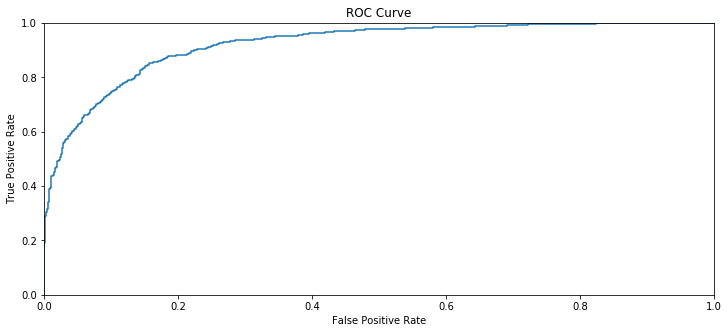

AUC Score:
 0.921402


In [30]:
def plot_roc_curve(fpr, tpr, label= None):
    plt.figure(figsize = (12,5))
    plt.plot(fpr, tpr, label = label)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
plot_roc_curve(fpr, tpr)
plt.show()
print("AUC Score:\n",metrics.roc_auc_score(y, scores))